## Building a Food rating System

In [1]:
import pandas as pd
import numpy as np


In [2]:
ratings = pd.read_csv("../DATASETS/fooddotcom/RAW_interactions.csv") 
ratings.head(10)


,user_id,recipe_id,date,rating,review
0,38094,40893,2/17/2003,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,12/21/2011,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,12/1/2002,4,This worked very well and is EASY. I used not...
3,126440,85009,2/27/2010,5,I made the Mexican topping and took it to bunk...
4,57222,85009,10/1/2011,5,"Made the cheddar bacon topping, adding a sprin..."
5,52282,120345,5/21/2005,4,very very sweet. after i waited the 2 days i b...
6,124416,120345,8/6/2011,0,"Just an observation, so I will not rate. I fo..."
7,2000192946,120345,5/10/2015,2,This recipe was OVERLY too sweet. I would sta...
8,76535,134728,9/2/2005,4,Very good!
9,273745,134728,12/22/2005,5,Better than the real!!


In [3]:
raw_rec = pd.read_csv("../DATASETS/fooddotcom/RAW_recipes.csv") 
raw_rec.head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,9/16/2005,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7


### Using Weighted average for each recipe  Average Rating

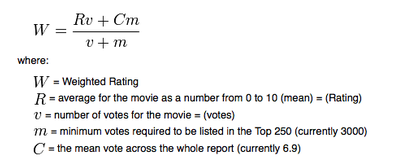

# Finding unique value ratings for each recipe id

In [4]:
n_frame = ratings.groupby( ["recipe_id"] )["rating"].value_counts().to_frame(name = 'n_ratings').reset_index()
n_frame.head(10)

,recipe_id,rating,n_ratings
0,38,4,3
1,38,5,1
2,39,3,1
3,40,5,6
4,40,4,2
5,40,1,1
6,41,5,1
7,41,4,1
8,43,1,1
9,45,0,1


# Total count of ratings for each recipe = v

In [5]:
sum_frame = n_frame.groupby(["recipe_id"])["n_ratings"].sum().to_frame(name = 'sum_ratingcount').reset_index()
sum_frame.head(2)

,recipe_id,sum_ratingcount
0,38,4
1,39,1


# Average rating for each recipe from 0 to 5 = R

In [6]:
avg_frame = ratings.groupby( ["recipe_id"] )["rating"].mean().to_frame(name = 'avg_ratings').reset_index()
avg_frame.head(2)

,recipe_id,avg_ratings
0,38,4.25
1,39,3.00


# Minimum number of counts required to calculate weighted average rating=m

In [7]:
countrate_threshold = n_frame[['n_ratings']].quantile(0.85)
countrate_threshold

n_ratings    4.0
Name: 0.85, dtype: float64

# Calculating current average rating across whole ratings = C

In [8]:
avg_rate_threshold = ratings[['rating']].mean()
avg_rate_threshold

rating    4.409798
dtype: float64

# Merging data in one dataframe

In [9]:
new_ratings = ratings.merge(sum_frame, on='recipe_id')
new1_ratings = new_ratings.merge(avg_frame, on='recipe_id')
new1_ratings.merge(avg_frame, on='recipe_id')


,user_id,recipe_id,date,rating,review,sum_ratingcount,avg_ratings_x,avg_ratings_y
0,38094,40893,2/17/2003,4,Great with a salad. Cooked on top of stove for...,2,4.5,4.5
1,1293707,40893,12/21/2011,5,"So simple, so delicious! Great for chilly fall...",2,4.5,4.5
2,8937,44394,12/1/2002,4,This worked very well and is EASY. I used not...,1,4.0,4.0
3,126440,85009,2/27/2010,5,I made the Mexican topping and took it to bunk...,2,5.0,5.0
4,57222,85009,10/1/2011,5,"Made the cheddar bacon topping, adding a sprin...",2,5.0,5.0
...,...,...,...,...,...,...,...,...
1048570,252514,196260,6/3/2012,5,These bars are very dense and filling. Perfect...,3,5.0,5.0
1048571,344231,196260,7/10/2016,5,I saved this recipe quite a few years ago... a...,3,5.0,5.0
1048572,199848,298599,4/7/2009,5,"Not the same old boring eggs, that's for sure!...",2,5.0,5.0
1048573,47892,298599,5/26/2011,5,We love arugula but as luck would have it I wa...,2,5.0,5.0


In [10]:
#All variables in the formulaa
v= new1_ratings['sum_ratingcount']
R= new1_ratings['avg_ratings']
C= new1_ratings['rating'].mean()
m= n_frame['n_ratings'].quantile(0.95)

### Using Weighted average for each recipe  Average Rating

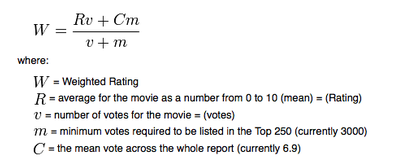

In [11]:
new1_ratings['weighted_average']=((R*v)+ (C*m))/(v+m)
new1_ratings

,user_id,recipe_id,date,rating,review,sum_ratingcount,avg_ratings,weighted_average
0,38094,40893,2/17/2003,4,Great with a salad. Cooked on top of stove for...,2,4.5,4.426198
1,1293707,40893,12/21/2011,5,"So simple, so delicious! Great for chilly fall...",2,4.5,4.426198
2,8937,44394,12/1/2002,4,This worked very well and is EASY. I used not...,1,4.0,4.368818
3,126440,85009,2/27/2010,5,I made the Mexican topping and took it to bunk...,2,5.0,4.517108
4,57222,85009,10/1/2011,5,"Made the cheddar bacon topping, adding a sprin...",2,5.0,4.517108
...,...,...,...,...,...,...,...,...
1048570,252514,196260,6/3/2012,5,These bars are very dense and filling. Perfect...,3,5.0,4.557349
1048571,344231,196260,7/10/2016,5,I saved this recipe quite a few years ago... a...,3,5.0,4.557349
1048572,199848,298599,4/7/2009,5,"Not the same old boring eggs, that's for sure!...",2,5.0,4.517108
1048573,47892,298599,5/26/2011,5,We love arugula but as luck would have it I wa...,2,5.0,4.517108


# Top 10 Rated Recipe List

In [12]:
raw_rec_new = raw_rec.merge(new1_ratings, left_on='id',right_on='recipe_id')
raw_rec_new_ranking = raw_rec_new.sort_values('weighted_average',ascending=False)
raw_rec_new_ranking = raw_rec_new_ranking[['user_id','name','recipe_id','ingredients','rating','sum_ratingcount','avg_ratings','weighted_average','review']]
raw_rec_new_ranking


,user_id,name,recipe_id,ingredients,rating,sum_ratingcount,avg_ratings,weighted_average,review
621646,2202400,mexican stack up rsc,486261,"['poblano pepper', 'reynolds wrap foil', 'oliv...",5,217,4.990783,4.967647,Absolutely amazing. We will make this often.
621738,2422136,mexican stack up rsc,486261,"['poblano pepper', 'reynolds wrap foil', 'oliv...",5,217,4.990783,4.967647,I knew I'd love this before I took th first bi...
621744,2422127,mexican stack up rsc,486261,"['poblano pepper', 'reynolds wrap foil', 'oliv...",5,217,4.990783,4.967647,I made two stacks....one exactly as posted and...
621743,2427055,mexican stack up rsc,486261,"['poblano pepper', 'reynolds wrap foil', 'oliv...",5,217,4.990783,4.967647,"Everyone loved it! No leftovers, much to my di..."
621742,2423978,mexican stack up rsc,486261,"['poblano pepper', 'reynolds wrap foil', 'oliv...",5,217,4.990783,4.967647,Such a fun dish! I got my kids involved with t...
...,...,...,...,...,...,...,...,...,...
813748,36135,sakura sauce,18260,"['egg yolks', 'egg', 'vegetable oil', 'white p...",0,10,0.000000,2.088852,Try adding soy sauce to mayonnaise. I think t...
813749,44482,sakura sauce,18260,"['egg yolks', 'egg', 'vegetable oil', 'white p...",0,10,0.000000,2.088852,"I tried this recipe last weekend, at first I h..."
813750,120954,sakura sauce,18260,"['egg yolks', 'egg', 'vegetable oil', 'white p...",0,10,0.000000,2.088852,OK guys ive played with a recipe simular to th...
813751,136250,sakura sauce,18260,"['egg yolks', 'egg', 'vegetable oil', 'white p...",0,10,0.000000,2.088852,I got better results using 1 Cup of oil instea...


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from textblob import TextBlob

pd.set_option('display.max_colwidth', 200)
warnings.filterwarnings("ignore")

TextBlob("The movie is not best").sentiment

Sentiment(polarity=-0.5, subjectivity=0.3)

In [14]:
new1_ratings.head(5)

,user_id,recipe_id,date,rating,review,sum_ratingcount,avg_ratings,weighted_average
0,38094,40893,2/17/2003,4,Great with a salad. Cooked on top of stove for 15 minutes.Added a shake of cayenne and a pinch of salt. Used low fat sour cream. Thanks.,2,4.5,4.426198
1,1293707,40893,12/21/2011,5,"So simple, so delicious! Great for chilly fall evening. Should have doubled it ;)<br/><br/>Second time around, forgot the remaining cumin. We usually love cumin, but didn't notice the missing 1/2 ...",2,4.5,4.426198
2,8937,44394,12/1/2002,4,This worked very well and is EASY. I used not quite a whole package (10oz) of white chips. Great!,1,4.0,4.368818
3,126440,85009,2/27/2010,5,I made the Mexican topping and took it to bunko. Everyone loved it.,2,5.0,4.517108
4,57222,85009,10/1/2011,5,"Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!",2,5.0,4.517108


In [15]:
new1_ratings.shape

(1048575, 8)

In [16]:
comm = new1_ratings.sample(2000)
comm.shape

(2000, 8)

# PERFORMING SENTIMENT ANALYSIS ON REVIEWS

In [17]:
pol=[] # list which will contain the polarity of the comments
for i in comm.review.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

In [18]:
comm['pol']=pol

# POSITIVE COMMENT=1 , NEUTRAL=0, NEGATIVE COMMENT=-1

In [19]:
comm['pol'][comm.pol==0]= 0
comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

In [20]:
#Displaying the POSITIVE comments
df_positive = comm[comm.pol==1]
df_positive.head(5)

,user_id,recipe_id,date,rating,review,sum_ratingcount,avg_ratings,weighted_average,pol
227571,339544,72308,6/19/2008,5,"This was absolutely delicious! I used fresh spinach from the garden and sliced a leftover Italian sausage over the top, but otherwise followed the recipe as written. It's a keeper!",139,4.618705,4.606001,1.0
324443,9869,168129,3/30/2007,5,"I made this for myself for dinner, I only used 2 eggs and it worked fine. A simple tasty dinner, I also made some sauteed mushrooms to go with it. Dinner was delicious! Thanks for sharing.",7,4.142857,4.293011,1.0
894269,4439,26489,8/31/2005,5,"excellent recipe! i used sugar free instant vanilla pudding mix, 1 % milk and cool whip lite and it did not taste healthy. it tasted rich and creamy and luscious! thank you!!!",7,5.000000,4.668011,1.0
250371,764845,111113,6/26/2008,5,I enjoyed this with a loaf of ciabatta from Panera Bread. I used red pepper flakes rather than black pepper. A very nice treat - Thank you!,5,5.000000,4.620584,1.0
353691,131126,130969,7/25/2005,5,I loved this recipe. Great flavor and an easy one pan meal. I did add 2 cloves of minced garlic when adding the zest & wine. I also added 1/2 of a bag of frozen crinkle cut carrots when adding ...,2,5.000000,4.517108,1.0


In [21]:
df_positive = comm[comm.pol==-1]
df_positive.head(1)

,user_id,recipe_id,date,rating,review,sum_ratingcount,avg_ratings,weighted_average,pol
763045,1424514,82959,10/24/2009,0,i took this recipe a little further. I added curry and pumpkin pie spice to it. I also added gold raisins and dried cherries. I also added a half a sweet potatoe chopped. the smells while baking w...,5,3.8,4.192013,-1.0


In [22]:
#Displaying the NEUTRAL comments
df_positive = comm[comm.pol==0]
df_positive.head(1)

,user_id,recipe_id,date,rating,review,sum_ratingcount,avg_ratings,weighted_average,pol
126398,503267,87782,1/6/2010,5,All I can say is Yum!,592,4.440878,4.440413,0.0


In [23]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [24]:


@interact
def show_articles_more_than(column=['user_id', 'recipe_id', 'rating', 'weighted_average'], 
                            x=(10, 100000, 10)):
    return new1_ratings.loc[new1_ratings['recipe_id'] > x]

interactive(children=(Dropdown(description='column', options=('user_id', 'recipe_id', 'rating', 'weighted_aver…

# FILTERING POSITIVE RESPONSE BASED ON POLARITY AND WEIGHTED AVERAGE

In [27]:
#Combining positive polarity comments and avaerage rating above 4


    
df_positive.loc[(df_positive["weighted_average"] > 3) & (df_positive["pol"] == 1)]
    
  

,user_id,recipe_id,date,rating,review,sum_ratingcount,avg_ratings,weighted_average,pol
126398,503267,87782,1/6/2010,5,All I can say is Yum!,592,4.440878,4.440413,1
601607,1426037,185564,5/3/2010,5,"I've been making Carroll Shelby's little-brown-bag-chili ever since I've been a grown-up, and the seasonings in this are spot-on. The only difference is the addition of the beer and cheese. Oh, an...",1,5.000000,4.468818,1
969973,487868,115633,2/16/2011,1,I used Captain Crunch and these turned out really gross. Couldn't even eat them.,21,3.809524,3.989606,1
167473,1184898,198958,2/26/2009,0,Do not make!!,4,2.250000,3.745245,1
307559,356130,18638,2/23/2007,5,this was a hit at family night,7,3.571429,4.043011,1
701397,2001520768,249190,5/10/2017,3,Why not add one egg? To avoid the falling apart? And a pinch of nutmeg.,14,4.357143,4.377747,1
864836,130663,128746,6/7/2006,0,"As I never had avocado before that I can remember,I can,t give it a rating.I ended using it in a salad.",102,4.666667,4.645839,1
223396,60866,22684,11/24/2004,4,I fix this dish every Thanksgiving. Everyone loves it!!,14,4.071429,4.203834,1
377836,154136,362652,3/25/2009,0,not home made has dressing mix in it,1,0.000000,3.968818,1
401835,593780,121490,5/11/2009,5,Another rave review for the strawberry bread. Thank you for posting this recipe!,261,4.659004,4.650697,1


In [35]:
df_positive[df_positive["avg_ratings"] > 4].count()

user_id             28
recipe_id           28
date                28
rating              28
review              28
sum_ratingcount     28
avg_ratings         28
weighted_average    28
pol                 28
dtype: int64